# COMP377: AI for Software Developers
## Assignment 1: Polynomial Regression
### Exercise 2

Name: Wenjie Zhou

Student ID: 301337168

Date: September 26, 2024

File Name: WenjieZhou_COMP377Lab1_Ex2

### Instructions

1.  Complete the code in the cells provided according to the instructions given in the comments.
2.  Ensure that your code runs without errors.
3.  Submit your completed notebook via eCentennial.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing

### Part 1: Data Loading

In [2]:
## Part 1: Data Loading ##

# Load the California housing dataset
california_housing = fetch_california_housing()

# Assign the data and target to variables
X = california_housing.data
y = california_housing.target

### Part 2: Data Preprocessing

In [3]:
## Part 2: Data Pre-processing ##

# Split the data by 70/30 rule due to the large size of the dataset (20640 samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Part 3: Create and Train Model

In [4]:
## Part 3: Model Training ###

# Create a polynomial regression model with degree 2 and fit the model to the training data
polynomial_regression_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polynomial_regression_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

### Part 4: Test Model

In [5]:
### Part 4: Model Evaluation ###

# Make predictions on the test data
y_pred = polynomial_regression_model.predict(X_test)

# Ask the user to input the attributes of a new house to predict its price
med_inc = float(input("Median Income (in $): "))
house_age = float(input("House Age (in years): "))
ave_rooms = float(input("Average Rooms per household: "))
ave_bedrooms = float(input("Average Bedrooms per household: "))
population = int(input("Population: "))
ave_occup = float(input("Average Occupants per household: "))
latitude = float(input("Latitude: "))
longitude = float(input("Longitude: "))

# Create an input array from the user input
input_data = np.array([[med_inc, house_age, ave_rooms, ave_bedrooms, population, ave_occup, latitude, longitude]])

# Predict the price using the trained polynomial regression model
predicted_price = polynomial_regression_model.predict(input_data)

### Part 5: Calculate Accuracy & Accuracy

In [6]:
### Part 5: Model Accuracy ###

# Calculate the Mean Squared Error, Mean Absolute Error, and R2 Score of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.454972339229802
Mean Absolute Error: 0.4633300621732001
R2 Score: 0.6533650007940759


### Visualization and Display (Optional)

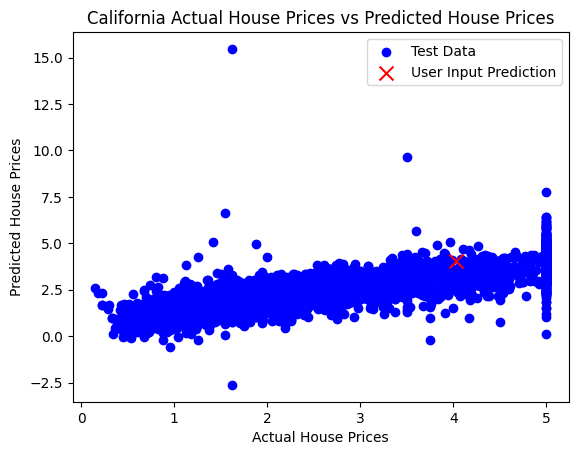

In [7]:
### Visualization & Display ###

## Print Results to the Screen ###
plt.scatter(y_test, y_pred, label="Test Data", color="blue")
plt.scatter(predicted_price, predicted_price, label="User Input Prediction", color="red", marker='x', s=100)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('California Actual House Prices vs Predicted House Prices')
plt.legend()
plt.show()

### Summary and Conclusions

Mean Squared Error: 0.454972339229802

Mean Absolute Error: 0.4633300621732001

R2 Score: 0.6533650007940759

Based on the results, the polynomial regression model developed for predicting house prices demonstrates reasonable performance. The Mean Squared Error of 0.45 and Mean Absolute Error of 0.46 indicate that the model's predictions are relatively close to the actual values. However, the R² score of 0.65 suggests that there is still a portion of variability in house prices that remains unexplained by the model. Possible improvements include introducing additional relevant features, experimenting with different degrees of polynomial regression, identifying and removing outliers, and collecting a larger dataset to provide the model with a richer context for better predictions.